In [ ]:
import pandas as pd

https://www.data.go.kr/dataset/fileDownload.do?atchFileId=FILE_000000001589824&fileDetailSn=1&publicDataDetailPk=uddi:f366c9c7-2e32-4915-9cdf-9dc7aa26f77e_201911181425 

https://www.data.go.kr/dataset/fileDownload.do?atchFileId=FILE_000000001483739&fileDetailSn=1&publicDataDetailPk=uddi:f9d4dcdf-5e61-489a-88a4-c2d7aaf79c98_201810101622

https://bigdata.busan.go.kr/board/view.busan?boardId=DATA&menuCd=DOM_000000102006000000&startPage=2&categoryCode1=F01&dataSid=41


In [179]:
# p_cctv = pd.read_csv('./data/부산광역시_CCTV_20191031.csv', encoding='euc-kr')

p_cctv = pd.read_csv('./data/부산CCTV정보서비스.csv')

In [180]:
p_cctv.columns

Index(['순번', 'CCTV_STORE_DAYS', 'CCTV_ADDR_ROAD', 'CCTV_LAT', 'CCTV_LNG',
       'CCTV_INSTT', 'CCTV_PIXEL', 'CCTV_GUBUN', 'CCTV_CAMERA_NUM',
       'CCTV_ADDR', 'CCTV_GUGUN', 'CCTV_PHONE'],
      dtype='object')

In [181]:
# p_cctv.drop(columns=['소재지도로명주소', '소재지지번주소',  '카메라화소수', '촬영방면정보',
#        '보관일수', '설치년월', '관리기관전화번호', '데이터기준일자'],inplace=True  )
# p_cctv = p_cctv[['소재지지번주소','카메라대수','위도', '경도']]
p_cctv =  p_cctv[['CCTV_GUGUN','CCTV_CAMERA_NUM']]

In [182]:
p_cctv.head()

,CCTV_GUGUN,CCTV_CAMERA_NUM
0,북구,2
1,북구,2
2,북구,1
3,북구,2
4,북구,1


In [183]:
# p_cctv['자치구'] = p_cctv.소재지지번주소.str.split(' ').str[1]
# p_cctv.head()
p_cctv.shape

(3983, 2)

In [184]:
p_cctv1 = p_cctv.groupby('CCTV_GUGUN')['CCTV_CAMERA_NUM'].sum()

In [185]:
p_cctv2 = pd.DataFrame(p_cctv1)
p_cctv2.head()

,CCTV_CAMERA_NUM
CCTV_GUGUN,
금정구,562
기장군,860
동래구,406
북구,828
사하구,768


In [186]:
dic = {  'CCTV_CAMERA_NUM':'소계'  }
p_cctv2.rename( columns=dic, inplace=True  )
p_cctv2.index.name = '자치구'

In [187]:
p_cctv2.head()

,소계
자치구,
금정구,562
기장군,860
동래구,406
북구,828
사하구,768


In [188]:
p_cctv2.shape

(8, 1)

In [189]:
p_pop = pd.read_csv('./data/부산광역시_주민등록인구통계_2019년_9월말.csv', encoding='euc-kr')

In [190]:
p_pop.head()

,구군,동수 (개소),세대수 (세대),인구수 (명),남자인구수 (명),여자인구수 (명),시전체 인구에 대한 구성비 (%),면적 (㎢),인구밀도 (명/㎢)
0,중구,9,"23,093","44,223","21,987","22,236",1.272488,2.83,"15,627"
1,서구,13,"52,914","111,044","54,263","56,781",3.195217,13.98,"7,943"
2,동구,12,"44,075","89,692","44,103","45,589",2.580828,9.74,"9,209"
3,영도구,11,"55,018","119,602","59,289","60,313",3.441468,14.20,"8,423"
4,부산진구,20,"166,434","362,296","175,453","186,843",10.424827,29.67,"12,211"


In [191]:
p_pop =  p_pop[['구군','인구수 (명)']]

In [192]:
dic = { p_pop.columns[0]:'자치구',  
        p_pop.columns[1]:'인구수'
      }
p_pop.rename( columns=dic, inplace=True )
p_pop.set_index( '자치구', inplace=True )
p_pop.head(2)

,인구수
자치구,
중구,"44,223"
서구,"111,044"


In [193]:
print(p_cctv2.shape)
print(p_pop.shape)

(8, 1)
(16, 1)


In [ ]:
data_result = pd.merge( p_pop, p_cctv2, how='left', left_index=True, right_index=True )
data_result

In [194]:
data_result1 = pd.merge( p_pop, p_cctv2, on='자치구' )
data_result1

,인구수,소계
자치구,,
중구,"44,223",496
동래구,"271,004",406
북구,"294,030",828
해운대구,"411,445",612
사하구,"327,956",768
금정구,"245,670",562
연제구,"210,393",417
기장군,"167,231",860


In [195]:
data_result1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 중구 to 기장군
Data columns (total 2 columns):
인구수    8 non-null object
소계     8 non-null int64
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [196]:
data_result1['인구수'] = data_result1['인구수'].str.replace(",","")
data_result1['인구수'] = data_result1['인구수'].astype(str).astype(float)
data_result1['소계'] = data_result1['소계'].astype(str).astype(float)

In [197]:
data_result1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 중구 to 기장군
Data columns (total 2 columns):
인구수    8 non-null float64
소계     8 non-null float64
dtypes: float64(2)
memory usage: 192.0+ bytes


In [198]:
import numpy as np
np.corrcoef( data_result1['인구수'], data_result1['소계'] )

array([[1.        , 0.20647449],
       [0.20647449, 1.        ]])

In [199]:
import matplotlib.pyplot as plt
# 주피터 내장
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc

In [ ]:
plt.rc('font', family='NanumGothic')

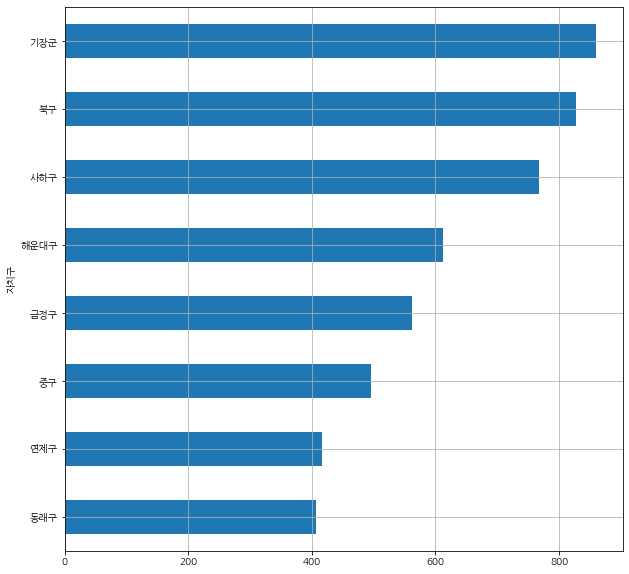

In [200]:
plt.figure()
plt.rc('font', family='NanumGothic')
data_result1['소계'].sort_values().plot( kind='barh', grid=True, figsize=(10,10) )
plt.show()

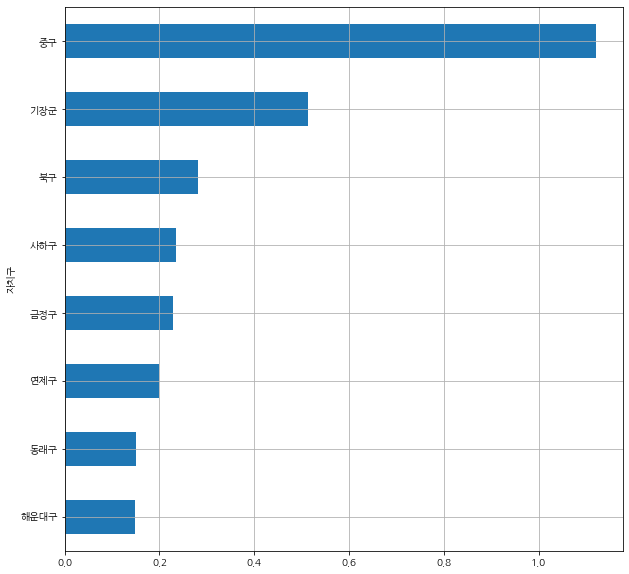

In [201]:
data_result1['CCTV비율'] = data_result1['소계']/data_result1['인구수']*100
data_result1['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

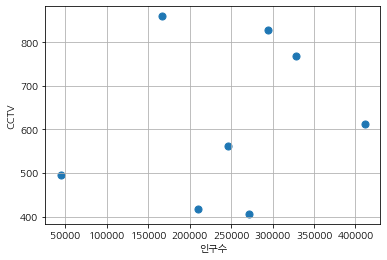

In [202]:
# x축 인구수, y축은 cctv수는 분포도 표현
plt.scatter( data_result1['인구수'],data_result1['소계'], s=50 )
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [203]:
fp1 = np.polyfit( data_result1['인구수'], data_result1['소계'], 1 )
fp1

array([3.38169652e-04, 5.35268210e+02])

In [204]:
f1 = np.poly1d( fp1 )

In [205]:
x  = np.linspace( 50000, 500000, 100 ) 

In [206]:
data_result1['오차']=np.abs( data_result1['소계'] 
                         - f1(data_result1['인구수']) )
df_sort = data_result1.sort_values( by='오차', ascending=False )
df_sort.head(2)

,인구수,소계,CCTV비율,오차
자치구,,,,
기장군,167231.0,860.0,0.514259,268.179341
동래구,271004.0,406.0,0.149813,220.913538


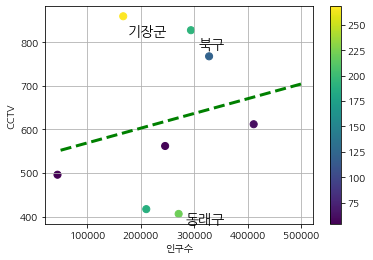

<Figure size 432x288 with 0 Axes>

In [207]:
plt.scatter( data_result1['인구수'],data_result1['소계'], 
            c=data_result1['오차'],
            s=50 )
plt.plot( x, f1(x), ls='dashed', lw=3, color='g' )
for n in range(3):
    plt.text( df_sort['인구수'][n]*1.05, df_sort['소계'][n]*0.95 ,
            df_sort.index[n], fontSize=14)
    
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.colorbar()
plt.show()
plt.savefig('AAA.png')